In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score


In [7]:
# loadind the data
train = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\train_qnU1GcL.csv')

In [9]:
test=pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\test.csv')

In [10]:
#variable identification
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [11]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [12]:
# univariate analysis for continuous variables
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


<AxesSubplot:>

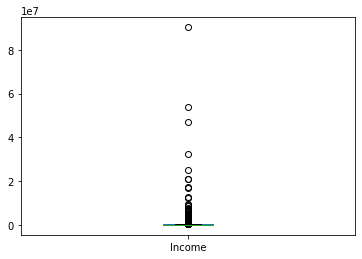

In [13]:
#univariate analysis of outliers
train['Income'].plot.box()

<AxesSubplot:>

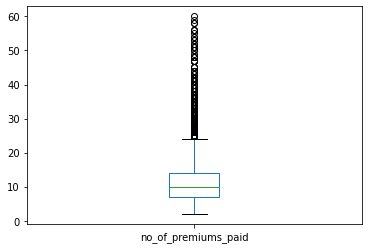

In [14]:
train['no_of_premiums_paid'].plot.box()

<AxesSubplot:>

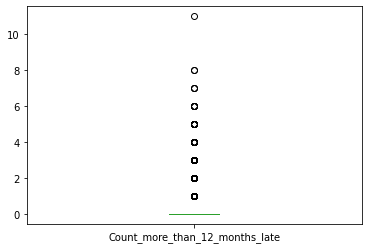

In [15]:
train['Count_more_than_12_months_late'].plot.box()

In [16]:
train.loc[train['no_of_premiums_paid']>22,'no_of_premiums_paid']=np.mean(train['no_of_premiums_paid'])

In [17]:
train.loc[train['Count_3-6_months_late']>0.25,'Count_3-6_months_late']=np.mean(train['Count_3-6_months_late'])

In [18]:
train.loc[train['Count_more_than_12_months_late']>0.0001,'Count_more_than_12_months_late']=np.mean(train['Count_more_than_12_months_late'])

In [19]:
train.loc[train['Income']>0.40e6,'Income']=np.mean(train['Income'])

In [20]:
train.loc[train['age_in_days']>34000,'age_in_days']=np.mean(train['age_in_days'])

<AxesSubplot:xlabel='age_in_days', ylabel='Income'>

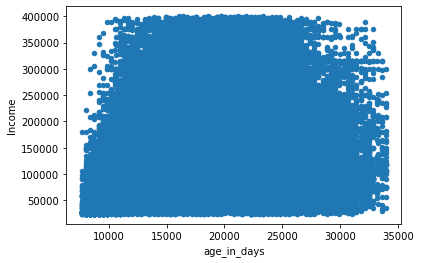

In [21]:
train.plot.scatter('age_in_days','Income')

In [22]:
#univariate analysis for categorical variable
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

<AxesSubplot:>

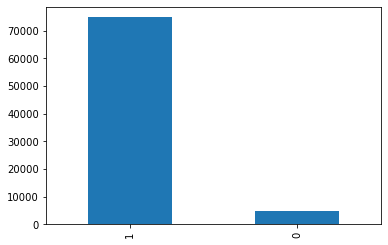

In [23]:
#creating a bar plot for frequencies of target variable
train['target'].value_counts().plot.bar()

In [24]:
train.fillna(0,inplace=True)

In [25]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [26]:
test.fillna(0,inplace=True)

In [27]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

<AxesSubplot:>

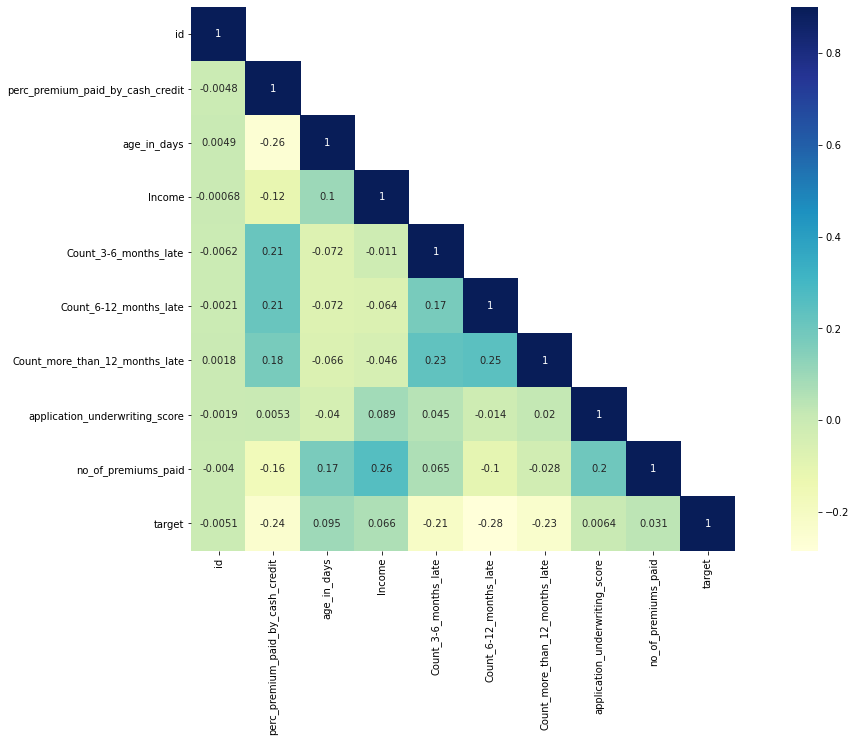

In [28]:
# looking at the correlation between numerical variables
corr = train[['id','perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [29]:
x=train.drop(['target','sourcing_channel'],axis=1)
y=train['target']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_X,test_X,train_y,test_y=train_test_split(x,y,random_state=101,stratify=y)

In [32]:
train_y.value_counts(),test_y.value_counts()


(1    56141
 0     3748
 Name: target, dtype: int64,
 1    18714
 0     1250
 Name: target, dtype: int64)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# initialize the logistic regression model
lModel = LogisticRegression()

In [35]:
train_X=pd.get_dummies(train_X)
text_X=pd.get_dummies(test_X)

In [36]:
# fitting the model on X_train and train_y
lModel.fit(train_X,train_y)

LogisticRegression()

In [37]:
# making prediction on validation set
prediction = lModel.predict(text_X)

In [38]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [39]:
rmsle(test_y,prediction)

0.1734429641153818

In [40]:
lModel.score(train_X,train_y)

0.9374175558115848

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
# defining a decision tree model with a depth of 7.
dt_reg = DecisionTreeRegressor(max_depth=7,splitter='best')

In [45]:
prediction.shape, train_X.shape, train_y.shape, text_X.shape, test_y.shape

((19964,), (59889, 11), (59889,), (19964, 11), (19964,))

In [46]:
dt_reg.fit(train_X, train_y)

DecisionTreeRegressor(max_depth=7)

In [47]:
predict = dt_reg.predict(text_X)

In [48]:
# calculating rmsle of the predicted values
rmsle(test_y, predict)

0.1561902313492483

In [49]:
test=test.drop('sourcing_channel',1)

In [50]:
test=pd.get_dummies(test)

In [51]:
test.shape,train_X.shape

((34224, 11), (59889, 11))

In [52]:
test_prediction =dt_reg.predict(test)

In [53]:
dt_reg.score(train_X, train_y)

0.19630907884512228

In [54]:
L1 = pd.DataFrame()

In [55]:
L1['id'] = test['id']

In [56]:
# creating a target column and saving the predictions in it
L1['target'] = test_prediction

In [57]:
L1.to_csv('L1.csv', header=True, index=False)